In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [6]:
mndata = MNIST('samples')
train_X, train_y = mndata.load_training()
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X, test_y = mndata.load_testing()
test_X = np.array(test_X)
test_y = np.array(test_y)

In [7]:
data_folder = '/home/nao/bilhr23ss/workspace/src/tutorial_3/datasets/'

dataset = np.loadtxt(data_folder + 'data.txt')
X_train = dataset[:,:2]
Y_train = dataset[:,2:]


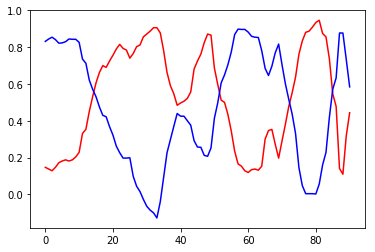

In [9]:
%matplotlib inline
plt.plot(X_train[:,0],'r')
plt.plot(Y_train[:,1],'b')
plt.show()

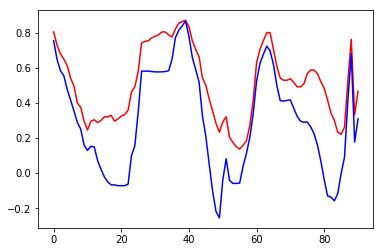

In [10]:
%matplotlib inline
plt.figure()
plt.plot(X_train[:,1],'r')
plt.plot(Y_train[:,0],'b')
plt.show()

In [14]:
def init(x,y,z):
    
    layer=np.random.uniform(-1.,1.,size=(x,y,z))#/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)

weights = init(50,50,2)



In [43]:
#forward and backward pass
def forward_backward_pass(x,y,n,a):
   

    x = np.floor(x*50).astype(int)
    print(x)

    output1 = weights[np.max([x[:,0]-n,0]):np.min([x[:,0]+n,49]), np.max([x[:,1]-n,0]):np.min([x[:,1]+n,49]), 0].sum
    output2 = weights[np.max([x[0]-n,0]):np.min([x[0]+n,49]), np.max([x[1]-n,0]):np.min([x[1]+n,49]), 1].sum

    output = np.array([output1, output2])
    
    update_w1=weights[np.max([x[0]-n,0]):np.min([x[0]+n,49]), np.max([x[1]-n,0]):np.min([x[1]+n,49]), 0] + a*(y[0]-output1)/((n*2)+1)

    update_w2=weights[np.max([x[0]-n,0]):np.min([x[0]+n,49]), np.max([x[1]-n,0]):np.min([x[1]+n,49]), 1] + a*(y[1]-output2)/((n*2)+1)

    return output 

In [44]:
epochs = 50000
lr = 0.0001
n = 1

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=1)
    x=X_train[sample]
    y=Y_train[sample]
 
    print(x.shape)
    print(y.shape)
    print(weights.shape)

    out=forward_backward_pass(x,y,n,lr)
  
    #category=np.argmax(out,axis=1)
    accuracy=((out-y)/y).mean()
    accuracies.append(accuracy)
    
    loss=((out-y)**2).mean()
    losses.append(loss.item())

   
    if(i%1000==0): print('For %dth epoch: train error: %.3f ' % (i, accuracy))

(1, 2)
(1, 2)
(50, 50, 2)
[[ 6 33]]


TypeError: only integer scalar arrays can be converted to a scalar index